In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('card_transdata.csv')

In [6]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [8]:
df.shape

(1000000, 8)

In [9]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [11]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [12]:
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [13]:
df['fraud'].unique()

array([0., 1.])

In [14]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [15]:
corelation=df.corr()

<AxesSubplot:>

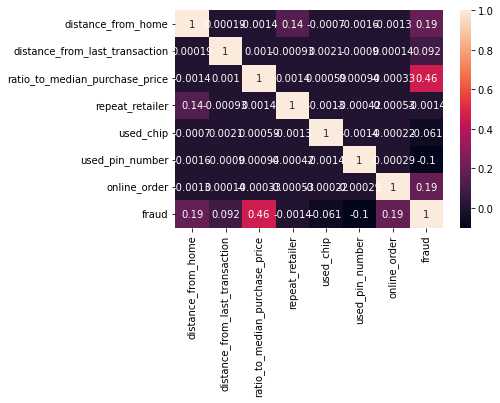

In [16]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [17]:
per75=df.fraud.quantile(0.75)
per75

0.0

<AxesSubplot:>

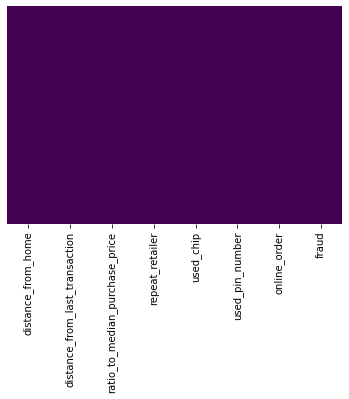

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.iloc[:,:-1]
Y=df['fraud']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800000, 7)
(200000, 7)
(800000,)
(200000,)


<AxesSubplot:xlabel='online_order', ylabel='fraud'>

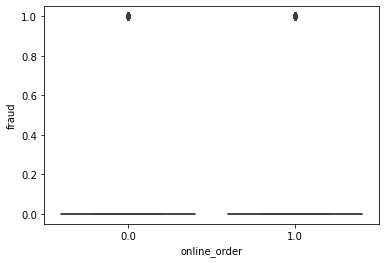

In [24]:
sns.boxplot(x='online_order',y='fraud',data=df)

In [25]:
%matplotlib inline

In [33]:
max_threshold=df['fraud'].quantile(0.95)
max_threshold

1.0

In [34]:
df[df['fraud']>max_threshold]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [35]:
min_threshold=df['fraud'].quantile(0.05)
min_threshold

0.0

In [36]:
df[df['fraud']<min_threshold]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [37]:
df[(df['fraud']<max_threshold)&(df['fraud']>min_threshold)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [38]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
correlation=df.corr()
print(correlation['fraud'].sort_values(ascending=False))

fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64


<AxesSubplot:>

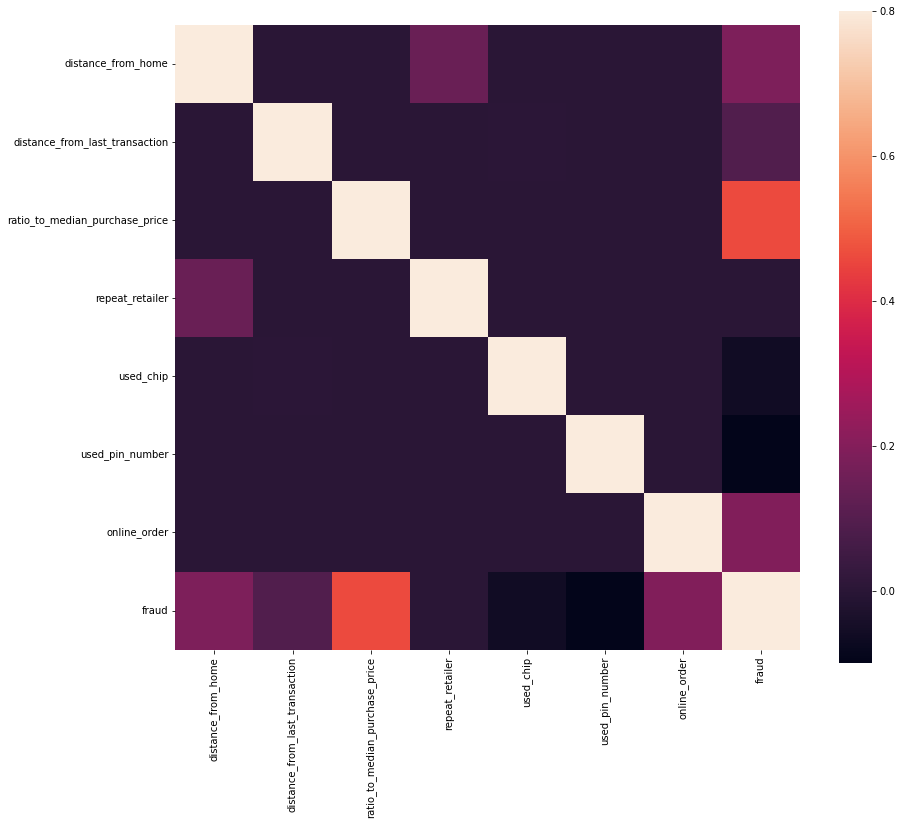

In [43]:
f , ax=plt.subplots(figsize=(14,12))
sns.heatmap(correlation,square=True,vmax=0.8)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
def mscore(model):
    print('Training Score',model.score(X_train,Y_train))
    print('Testing Score',model.score(X_test,Y_test))

def gen_matrix(Y_test,Y_pred):
    cm  = confusion_matrix(Y_test,Y_pred)
    print(cm)
    print(classification_report(Y_test,Y_pred))
    print('Accyracy Score',accuracy_score(Y_test,Y_pred))

In [47]:
m2=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=12)
m2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=12)

In [48]:
mscore(m2)

Training Score 0.99226375
Testing Score 0.992965


In [49]:
ypred_m2 = m2.predict(X_test)
print(ypred_m2)

[0. 0. 0. ... 0. 0. 0.]


In [50]:
gen_matrix(Y_test,ypred_m2)

[[181284   1291]
 [   116  17309]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    182575
         1.0       0.93      0.99      0.96     17425

    accuracy                           0.99    200000
   macro avg       0.96      0.99      0.98    200000
weighted avg       0.99      0.99      0.99    200000

Accyracy Score 0.992965


In [51]:
from sklearn.tree import plot_tree

In [52]:
fn=X_train.columns
cn=['0','1']
print(fn)
print(cn)

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')
['0', '1']


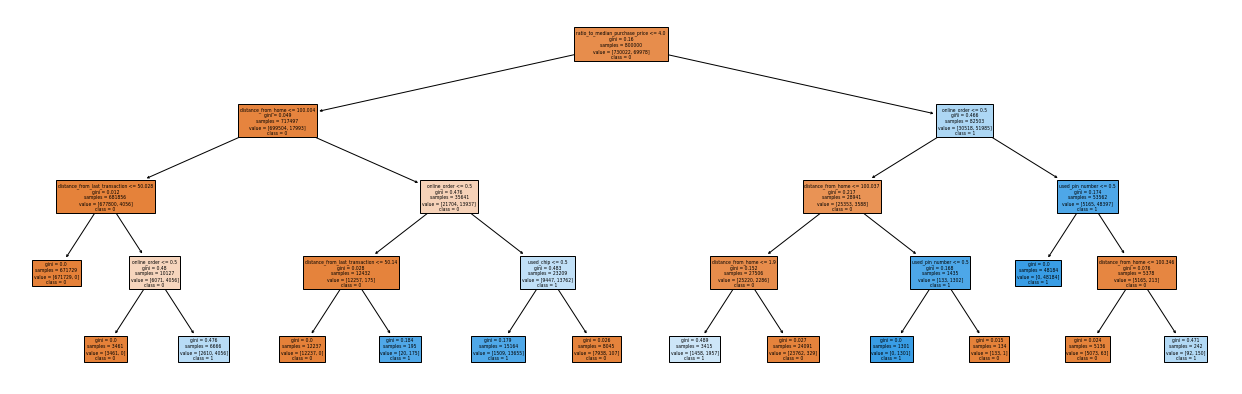

In [53]:
plt.figure(figsize=(22,7))
plot_tree(m2,feature_names=fn , class_names=cn,filled=True)
plt.show()